#### Lecture 8: 数据观测

数据和特征决定了机器学习上限，而模型和算法只能逼近这个上限。因此，我们对数据的认知和处理过程往往会占最多的工作量，在其上所消耗的时间甚至可能远远超过搭建模型的时间。

清晰的数据分析思路有利于我们快速建立对数据集的宏观认识，同时为后续构造有效且多样的数据特征打下基础。在数据特征较多时，‘看什么’和‘怎么看’是两个棘手的问题，我们很难一下子抓住整个数据集的核心，过于详细或过于粗糙且无目的地浏览数据并不是一个高效的选择，这样会使我们迷失在数据中。

进行数据观测的目的就是帮助我们快速建立对未知数据模式的有效观察，更好地在数据分析中抓住要点。

本节课介绍数据的常规可视化方法以及数据观测的策略。

##### 一、数据可视化方法

相比于数字和符号记录的数据，人们对可视化后的数据留有更为深刻的印象。图像可以蕴含数据的某些内在趋势，通过颜色或大小反映数据分布的差异，不同组之间的对比结果等。

##### 1. 基本绘图

matplotlib, Python数据科学生态中最为常用的第三方库之一，其中的pyplot模块封装了许多与绘图相关的方法，能够帮助我们快速的绘制单张图片。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 为了支持中文显示，需要进行一些参数配置
plt.rcParams['font.sans-serif']=['SimHei']  #用于正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

在绘图之前，需要明确绘制的数据类型和维度。我们主要以<font cloor='red'>数值型变量</font>和<font color='red'>类别型变量</font>来区分数据类型。

##### a) 一维数据

对于数值型的一维数据，可以通过直方图、箱线图来展示数据的分布。

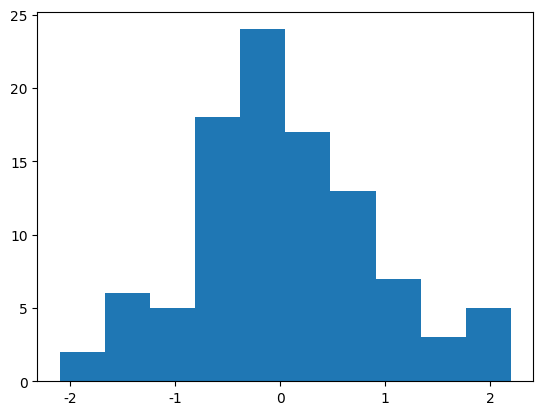

In [5]:
data=np.random.randn(100)
_=plt.hist(data)

# Notice, hist()函数是有返回值的，Python常把不需要的返回值赋给"_"变量。

直方图常用的参数有：

* align:柱子中心位于箱子的哪侧，left表示位于左侧，mid表示位于中间，right表示位于右侧。
* rwidth：柱子的宽度占bins宽度的比例
* bins：分箱个数
* density：是否进行频率归一化处理
* color:箱子颜色
* edgecolor:外框颜色
* alpha：透明度

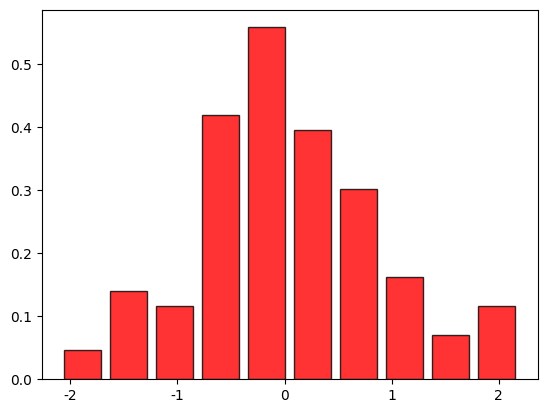

In [11]:
#修改上图的显示形式
_=plt.hist(data,align='mid',rwidth=0.8,bins=10,density=True,color='red',edgecolor='black',alpha=0.8)

箱线图，箱子的中线代表中位数，箱子的上边缘和下边缘代表上四分位数和下四分位数，箱子外侧的上下延伸先断点位置代表极值点的阈值。上端点为上四分位数加上1.5倍的上下四分位数之差，下端点为下四分位数减去1.5倍的上下四分位数之差。极端异常值用空心小球标记。

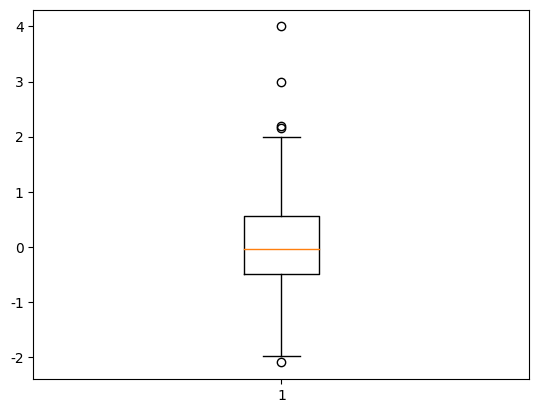

In [13]:
data=data.tolist()+[2,3,4]
_=plt.boxplot(data)

折线图：如果数据是有序排列的，比如时间序列数据，可以使用折线图体现数据的变化趋势

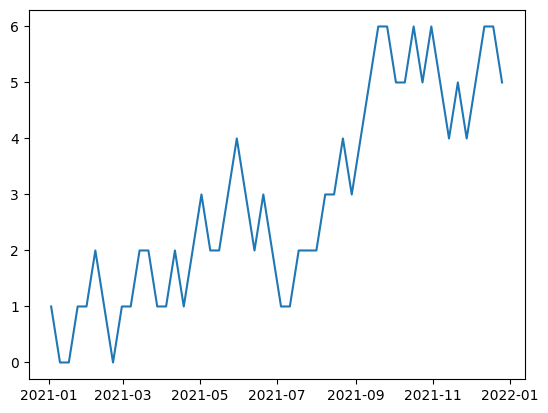

In [14]:
idx=pd.date_range('20210101','20211231',freq='W')
data=pd.Series(np.random.randint(-1,2,idx.shape[0]).cumsum(),idx)
plt.plot(data)

plot()函数的常用参数：
* linewidth：线的宽度
* linestyle：线的类型，实线"-",虚线'--'
* color：线的颜色
* marker:数据点使用的标记符号，点用'.'，菱形用'D'

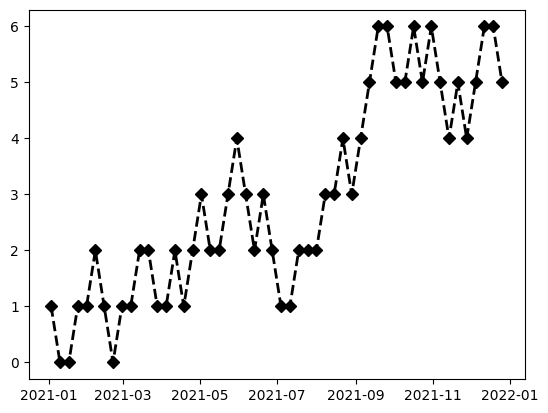

In [15]:
_=plt.plot(data,linewidth=2.0,color='black',marker='D',linestyle='--')

柱状图和饼图：用于对类别行数据进行可视化。

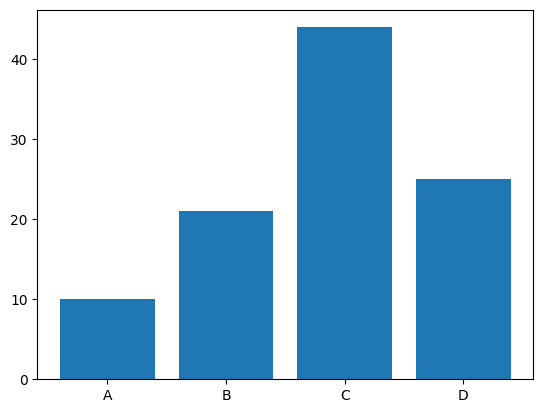

In [16]:
s=pd.Series(np.random.choice(list('ABCD'),size=100,p=[0.1,0.2,0.5,0.2]))
data=s.value_counts().sort_index()
_=plt.bar(data.index,data.values)

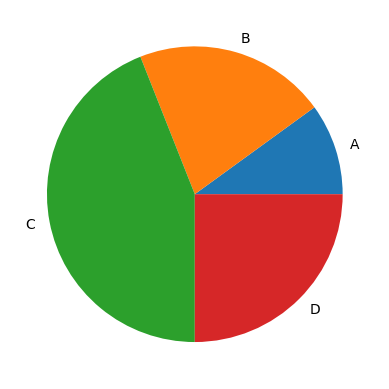

In [17]:
_=plt.pie(data.values,labels=data.index)

##### b) 二维数据

包含三类：数值型-数值型、数值型-类别型、类别型-类别型。在可视化时采用不同的策略。

* 数值型-数值型：可以使用散点图和密度图。

In [19]:
data=np.random.randn(30,2)
data.shape

(30, 2)

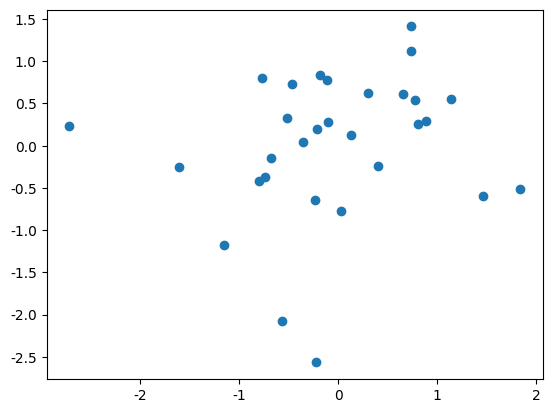

In [20]:
_=plt.scatter(data[:,0],data[:,1])

/var/folders/l_/5lmrjkpx3xv28w5ky6d9w2mc0000gn/T/ipykernel_53237/627753932.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='x',y='y',cmap='Reds',shade=True)


<AxesSubplot:xlabel='x', ylabel='y'>

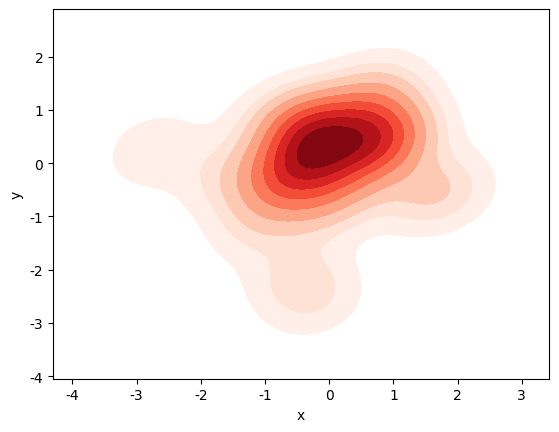

In [22]:
import seaborn as sns
df=pd.DataFrame(data,columns=['x','y'])
sns.kdeplot(data=df,x='x',y='y',cmap='Reds',shade=True)

* 数值-类别型二维数据：一般会统计类别组合频数，用热力图来表示。

In [28]:
p=[0.1,0.2,0.5,.2]
s1=pd.Series(np.random.choice(list('ABCD'),size=100,p=p),name='s1')
s2=pd.Series(np.random.choice(list('wxyz'),size=100,p=p),name='s2')
df=s1.to_frame().assign(s2=s2).assign(s3=0)
df.head()

,s1,s2,s3
0,C,y,0
1,B,y,0
2,C,x,0
3,C,y,0
4,D,y,0


In [29]:
res=df.pivot_table(index='s1',columns='s2',values='s3',aggfunc='count')
res

s2,w,x,y,z
s1,,,,
A,3.0,NaN,4.0,2.0
B,4.0,5.0,10.0,2.0
C,8.0,10.0,30.0,6.0
D,NaN,5.0,9.0,2.0


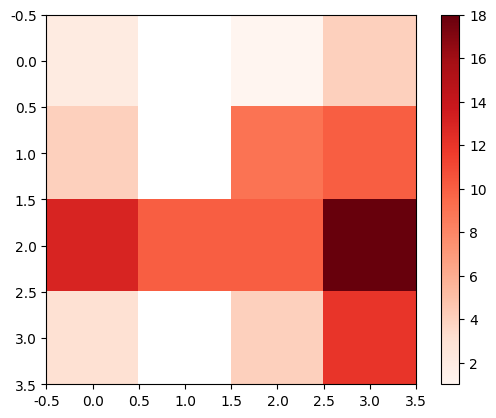

In [27]:
plt.imshow(res,cmap='Reds')
plt.colorbar()

* 数值型-类别型二维数据，通过分组绘图来表示。

In [31]:
df=pd.concat([pd.DataFrame({'num':np.random.randn(100)-1.5,'cat':'A'}),
pd.DataFrame({'num':np.random.randn(100)-0.5,'cat':'B'}),
pd.DataFrame({'num':np.random.randn(100)-0.5,'cat':'C'}),
pd.DataFrame({'num':np.random.randn(100)-0.5,'cat':'D'})
])
df.head()

,num,cat
0,-2.712377,A
1,-2.245117,A
2,-0.518840,A
3,-0.029593,A
4,-1.181381,A


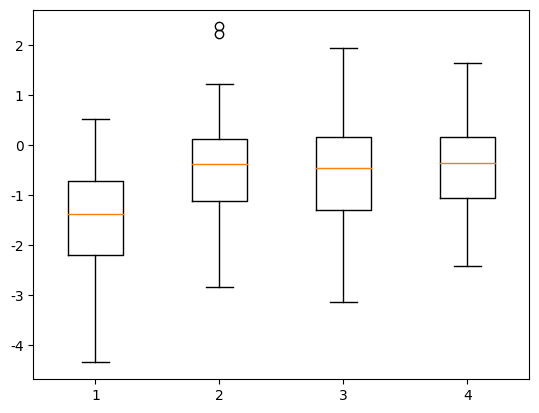

In [32]:
#可以构建箱线图
labels=df.cat.unique()
_=plt.boxplot([df.loc[df.cat==i,'num'].tolist() for i in labels])

##### 2. 图上的标签控制

标签控制对象包含标题元素控制、刻度控制和图例控制三个方面。

* 标题元素包含：画布标题、子图的标题、x轴标题、y轴标题。

Text(0.5, 1.0, 'Simple Plot')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


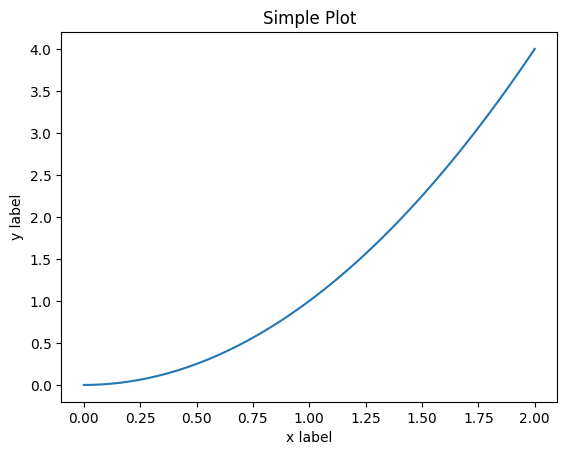

In [33]:
x=np.linspace(0,2,100)
plt.figure()
plt.plot(x,x**2,label='linear')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')

* 刻度控制：可以控制刻度坐标类型、刻度范围即刻度标签

([<matplotlib.axis.XTick at 0x7f959717ee80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

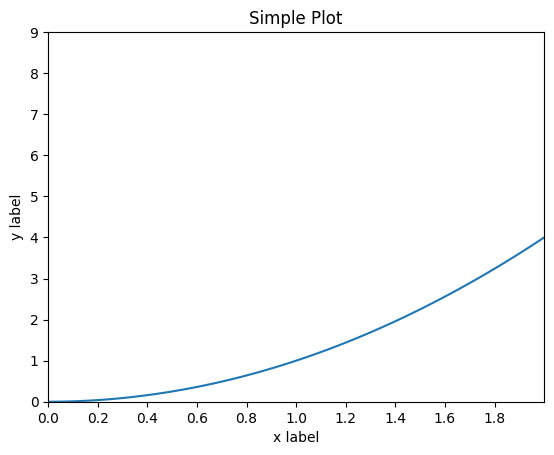

In [34]:
plt.figure()
plt.plot(x,x**2,label='linear')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
#添加刻度控制
plt.xlim(0,2)
plt.ylim(0,9)
plt.xticks(np.arange(0,2,0.2))

* 图例控制：通过两种途径添加，可以手动添加，也可以自动添加。

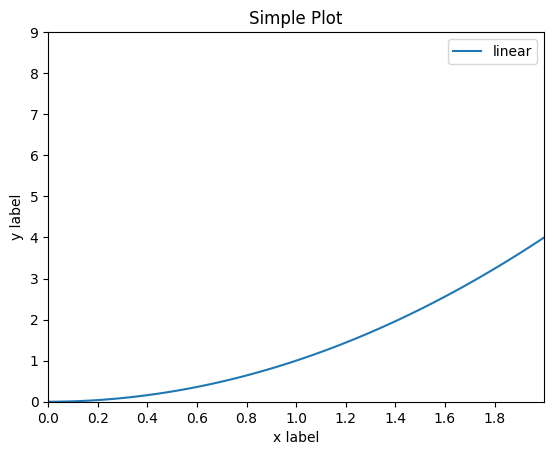

In [39]:
from logging import handlers


plt.figure()
plt.plot(x,x**2,label='linear') #自动添加图例
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
#添加刻度控制
plt.xlim(0,2)
plt.ylim(0,9)
plt.xticks(np.arange(0,2,0.2))
plt.legend()

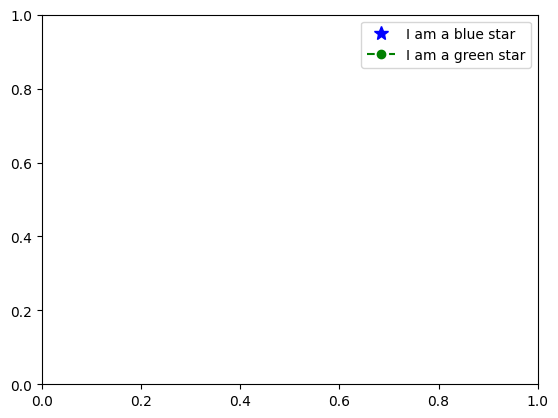

In [41]:
from matplotlib.lines import Line2D
handles=[
    Line2D([],[],color='blue',marker='*',linestyle='None',markersize=10,label='I am a blue star'),
    Line2D([],[],color='green',marker='o',linestyle='--',markersize=6,label='I am a green star'),
]
plt.legend(handles=handles)

##### 3. 绘制子图

创建子图的方法是使用对象的add_subplot()方法，需要传递三个参数：nrows、ncols和index.使用add_subplot()方法穿件子图有两种形式

* 三个参数值用逗号分隔，例如:fig.add_subplot(3,1,2) 创建3行1列图形的第2个子图
* 三个参数值放在一起，不用逗号分隔，例如：fig.add_subplot(312)

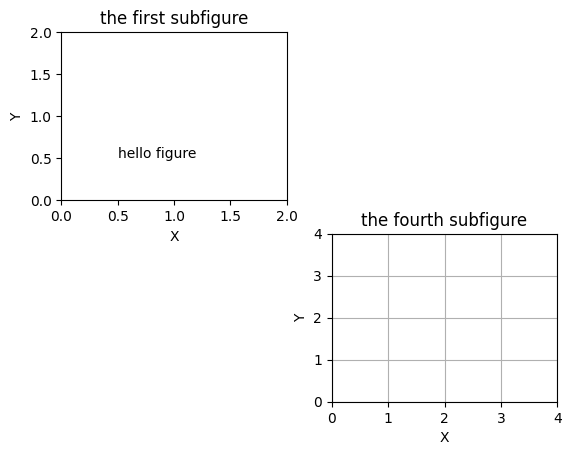

In [44]:
fig=plt.figure()
ax_1=fig.add_subplot(221)
ax_1.set(xlim=[0,2],ylim=[0,2],title='the first subfigure',ylabel='Y',xlabel='X')
plt.text(0.5,0.5,'hello figure')

ax_2=fig.add_subplot(224)
ax_2.set(xlim=[0,4],ylim=[0,4],title='the fourth subfigure',ylabel='Y',xlabel='X')
plt.grid()
plt.show()

还可以使用subplot()函数一次性创建多个子图，有两个参数:nrows和ncols.

/var/folders/l_/5lmrjkpx3xv28w5ky6d9w2mc0000gn/T/ipykernel_53237/2402581011.py:5: RuntimeWarning: divide by zero encountered in log
  ax[0,1].plot(x,np.log(x),color='red')


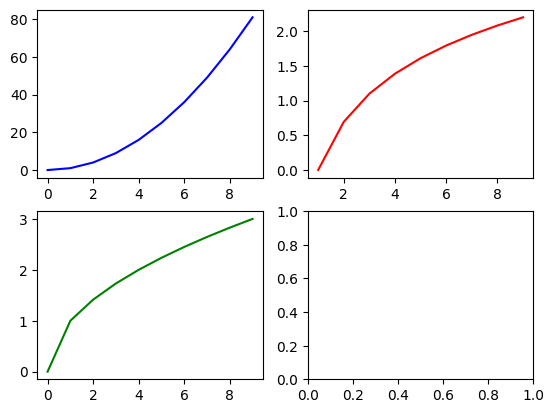

In [45]:
fig=plt.figure()
ax=fig.subplots(2,2)
x=np.arange(0,10)
ax[0,0].plot(x,x**2,color='blue')
ax[0,1].plot(x,np.log(x),color='red')
ax[1,0].plot(x,np.sqrt(x),color='green')
plt.show()

##### 数据观察

1. 数据类型

现实生活中的数据类型多种多样，数据的类型分为两类：原生类型和业务类型。
* 原生类型：数据本身的类型，与数据含义无关。
有数值类型、缺失类型、文本类型、分类类型及时间序列类型。对于缺失数据，可以计算缺失值所占的比例和数量，对于文本类型，可以利用预训练的语言模型进行向量嵌入，对于分类数据，可以观察类别的均衡度、种数、比例等，对于时间数据可以观察数据的连续性、范围和采样频率。


* 业务类型：有数据特征代表的含义与特征所属的业务类别

分为同质特征、同类特征及异类特征。

同质特征是指原生类型相同且数据含义相似的特征，比如近1个月销售额，近3个月销售额。

同类特征是指数据之间直接相关的特征，如用户身高、年龄和性别；

异质特征为数据含义之间并不直接相关的特征，如商品id和用户性别。

In [47]:
df=pd.read_csv('data/learn_pandas.csv')
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [49]:
df.columns[df.isna().mean()>0]

Index(['Height', 'Weight', 'Transfer'], dtype='object')

2. 数据统计量

统计量是指只依赖样本且不含总体分布位置参数的变量。包括范围型、频率型和矩特征型。

* 范围线包括：极差、极值、分位数、排名
* 频率型包括：频数、频率、唯一值、符合条件的样本
* 矩特征型包括：均值、方差、偏度和峰度。

偏度:s.skew(),峰度:s.kurt()

偏度大于0时，称为右偏或者正偏；偏度小于0时称为左偏或负偏。

Text(0.5, 1.0, '偏度:0.833188')

/Users/liutongcun/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  func(*args, **kwargs)
/Users/liutongcun/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
/Users/liutongcun/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liutongcun/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


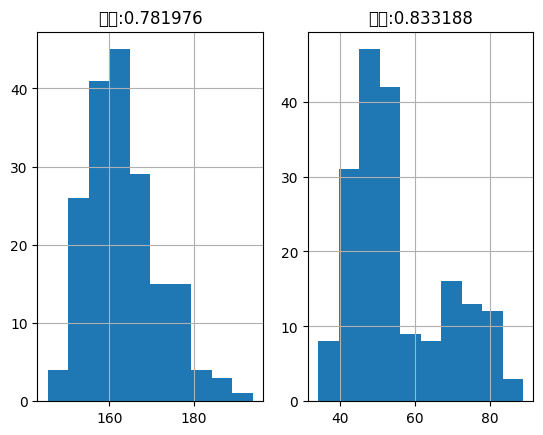

In [52]:
fig,axes=plt.subplots(1,2)
df.Height.hist(ax=axes[0])
axes[0].set_title('偏度:%.6f'% df.Height.skew())
df.Weight.hist(ax=axes[1])
axes[1].set_title('偏度:%.6f'% df.Weight.skew())

3. pandas中的数据分布绘图

a) 在对数据进行分析时，经常遇到数据分布不均衡问题，例如：

<AxesSubplot:>

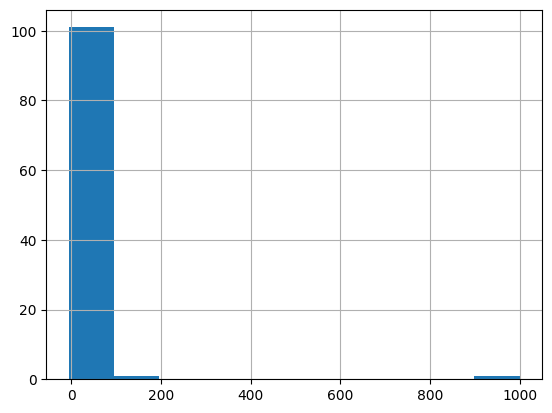

In [57]:
data=pd.Series((np.random.randn(100)*5+5).tolist()+[50,100,1000])
data.hist()

我们无法观察较小值区域内的分布情况。此时可以使用分位数阶段的方式或者clip()截断的方式。

<AxesSubplot:>

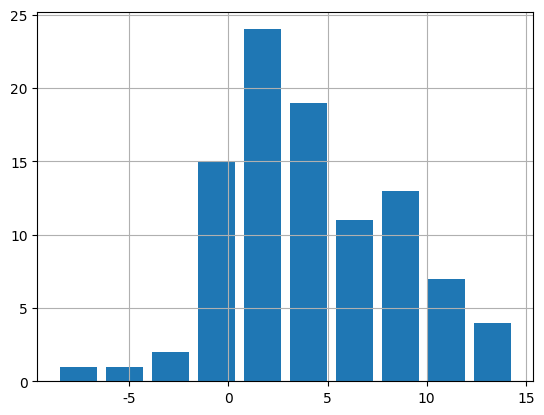

In [54]:
data[data<data.quantile(0.95)].hist(rwidth=0.8)

<AxesSubplot:>

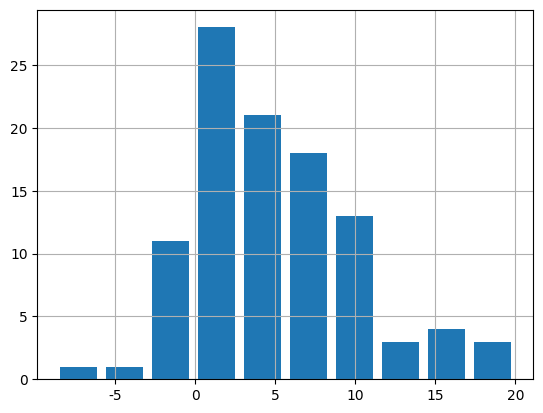

In [55]:
data.clip(-np.infty,20).hist(rwidth=0.8)

Pandas 对 Matplotlib 绘图软件包的基础上单独封装了一个plot()接口，通过调用该接口可以实现常用的绘图操作

* 折线图：plot()
* 柱状图：bar() 或 barh()
* 直方图：hist()
* 箱状箱：box()
* 区域图：area()
* 散点图：scatter()


<AxesSubplot:>

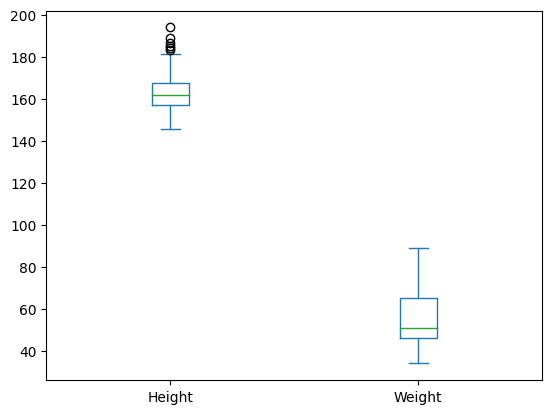

In [70]:
df[['Height','Weight']].plot.box()

##### 练习
Ex1. 只用直方图绘制learn_pandas.csv中的身高和体重分布

Ex2. 绘制身高和体重的关系图，横坐标为身高，纵坐标为体重









<AxesSubplot:>

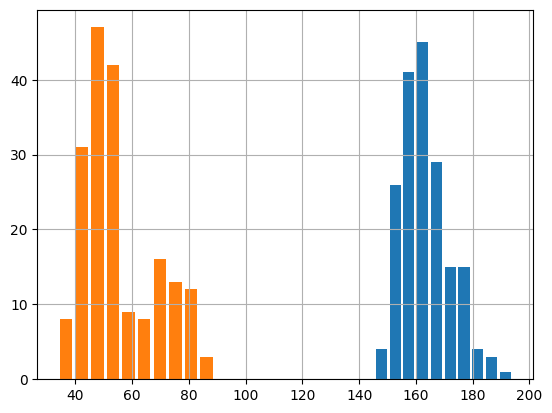

In [61]:








df.Height.hist(rwidth=0.8,bins=10)
df.Weight.hist(rwidth=0.8,bins=10)



<AxesSubplot:xlabel='Height', ylabel='Weight'>

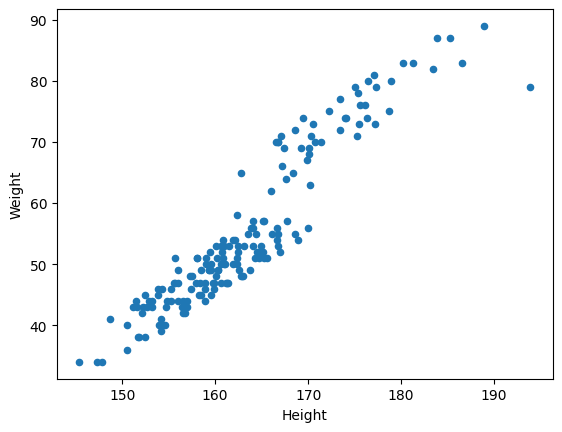

In [64]:
# Ex2
# plt.plot(df.Height.values,df.Weight.values)
df.plot.scatter(x='Height',y='Weight')

4. 基于数据报告的观测

如果手动对每个变量或每一组变量都进行一次相关操作是非常繁琐的。pandas-profiling包能够帮助我们解决大部分的观测汇总问题,自动生成数据报告。

可以通过pip或者conda安装

conda install -c conda-forge pandas-profiling

pip install pandas-profiling

In [56]:
#讲数据观测报告写入到html文件中，通过浏览器打开文件浏览报告内容

from pandas_profiling import ProfileReport
profile=ProfileReport(df,title='report',minimal=False)
profile.to_file('my_report.html')

/Users/liutongcun/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 183.90it/s]
